# Working with W2V Model

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns  
import matplotlib.pyplot as plt
%matplotlib inline

import pickle
from collections import defaultdict

import gensim
from gensim.models import Word2Vec

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from preprocessing_funcs import clean_tweet, get_hashtags, hashtag_dict

In [2]:
# to load the trained w2v model
model = gensim.models.Word2Vec.load("w2v.model")

In [3]:
model

## Word Similarity Scores

In [4]:
hc = ['hillary', 'clinton', 'hillary_clinton']
dt = ['donald', 'trump', 'donald_trump']

In [5]:
num_words = 25

top_hc = model.wv.most_similar(positive=hc, topn=num_words)
top_hc

[('crooked_hillary', 0.5789639949798584),
 ('trump', 0.5602606534957886),
 ('her', 0.5501365661621094),
 ('she', 0.5273261070251465),
 ('colin_powell', 0.4700460433959961),
 ('donald_trump', 0.4645646810531616),
 ('donna_brazile', 0.4516008198261261),
 ('clinton_camp', 0.4508870244026184),
 ('hillarys', 0.4418841600418091),
 ('dwstweets', 0.43959200382232666),
 ('clintonfdn', 0.4266970753669739),
 ('obama', 0.4214663505554199),
 ('indicthillary', 0.4194055497646332),
 ('hillaryhealth', 0.41749581694602966),
 ('politics', 0.41212713718414307),
 ('sickhillary', 0.4068112373352051),
 ('wikileaks', 0.4060392379760742),
 ('bill_clinton', 0.4056699872016907),
 ('huma_abedin', 0.4022705852985382),
 ('leaked_email', 0.40225276350975037),
 ('hillarys_emails', 0.4006217420101166),
 ('guccifer', 0.40010616183280945),
 ('sanders', 0.3987601399421692),
 ('dnc_leak', 0.3986196517944336),
 ('politics_extra', 0.39816075563430786)]

In [6]:
num_words = 27

top_dt = model.wv.most_similar(positive=dt, topn=num_words)
top_dt

[('clinton', 0.49410542845726013),
 ('real_donald', 0.46160635352134705),
 ('hillary_clinton', 0.4504524767398834),
 ('hillary', 0.4360019862651825),
 ('politics_extra', 0.41663339734077454),
 ('he', 0.413200706243515),
 ('rigged_election', 0.4111013114452362),
 ('christie', 0.40355807542800903),
 ('mike_pence', 0.39444461464881897),
 ('politics', 0.3942650556564331),
 ('melaniatrump', 0.37678325176239014),
 ('priebus', 0.37418320775032043),
 ('chris_christie', 0.37025678157806396),
 ('brunelldonald', 0.36632803082466125),
 ('obama', 0.3645317554473877),
 ('trumps', 0.3634759187698364),
 ('jeb', 0.351706862449646),
 ('jesse_jackson', 0.3471716344356537),
 ('crooked_hillary', 0.3450673222541809),
 ('him', 0.3450292944908142),
 ('bill_clinton', 0.33990374207496643),
 ('kellyanne_conway', 0.33907485008239746),
 ('president', 0.33846762776374817),
 ('morning_joe', 0.3373118042945862),
 ('peotus', 0.33549386262893677),
 ('rigged_system', 0.33363163471221924),
 ('campaign', 0.333601772785186

In [7]:
words_to_exclude = ['hillary_clinton','clinton', 'hillary','trump','donald_trump', 
                    'real_donald', 'him', 'he', 'she', 'her', 'trumps', 'hillarys']

In [8]:
all_hc_words = [word[0] for word in top_hc if word[0] not in words_to_exclude]
len(all_hc_words)

20

In [9]:
all_dt_words = [word[0] for word in top_dt if word[0] not in words_to_exclude]
len(all_dt_words)

20

In [10]:
shared_words = [word for word in all_hc_words if word in all_dt_words]
shared_words

['crooked_hillary', 'obama', 'politics', 'bill_clinton', 'politics_extra']

In [11]:
just_hc_words = [word for word in all_hc_words if word not in shared_words]
just_dt_words = [word for word in all_dt_words if word not in shared_words]

In [12]:
def word_sim_scores(w1_list, w2_list, word_list):
    w1_scores, w2_scores = [], []
    
    print('Word Similiarity Scores')
    print('-----------------------------------')
    print(f'Topic               {w1_list[1]}   {w2_list[1]}')
    print('-----------------------------------')
    for word in word_list:
        w1_score = max([model.wv.similarity(w1, word) for w1 in w1_list])
        w2_score = max([model.wv.similarity(w2, word) for w2 in w2_list])
        print("%-20s %4.4f  %4.4f" % (word, w1_score, w2_score))
        w1_scores.append(w1_score)
        w2_scores.append(w2_score)
        
    return w1_scores, w2_scores    

In [13]:
shared_score_hc, shared_score_dt = word_sim_scores(hc, dt, shared_words)

Word Similiarity Scores
-----------------------------------
Topic               clinton   trump
-----------------------------------
crooked_hillary      0.5541  0.3659
obama                0.3962  0.4197
politics             0.5121  0.4558
bill_clinton         0.3724  0.3019
politics_extra       0.4682  0.4632


In [16]:
hc_words_hc_scores, hc_words_dt_scores = word_sim_scores(hc, dt, just_hc_words)

Word Similiarity Scores
-----------------------------------
Topic               clinton   trump
-----------------------------------
colin_powell         0.4419  0.2965
donna_brazile        0.4253  0.2693
clinton_camp         0.4593  0.2608
dwstweets            0.4220  0.2569
clintonfdn           0.3989  0.1872
indicthillary        0.4218  0.1997
hillaryhealth        0.3882  0.2191
sickhillary          0.4054  0.1839
wikileaks            0.3870  0.2608
huma_abedin          0.4042  0.1718
leaked_email         0.4217  0.1879
hillarys_emails      0.3877  0.0845
guccifer             0.4086  0.1108
sanders              0.4297  0.2948
dnc_leak             0.3788  0.1823


In [17]:
dt_words_hc_scores, dt_words_dt_scores = word_sim_scores(hc, dt, just_dt_words)

Word Similiarity Scores
-----------------------------------
Topic               clinton   trump
-----------------------------------
rigged_election      0.4015  0.4039
christie             0.3869  0.3942
mike_pence           0.2301  0.3875
melaniatrump         0.2310  0.3135
priebus              0.3206  0.4138
chris_christie       0.2796  0.3726
brunelldonald        0.2800  0.3696
jeb                  0.2924  0.3425
jesse_jackson        0.3429  0.3300
kellyanne_conway     0.2901  0.3202
president            0.2055  0.3294
morning_joe          0.2244  0.3210
peotus               0.0980  0.3549
rigged_system        0.2674  0.3147
campaign             0.3872  0.3087


In [29]:
def annotate_points(x, y, label):
    for i, txt in enumerate(label):
        plt.annotate(txt,
                     xy=(x[i], y[i]),
                     xytext=(10, 0), textcoords='offset points',
                     fontsize=12)

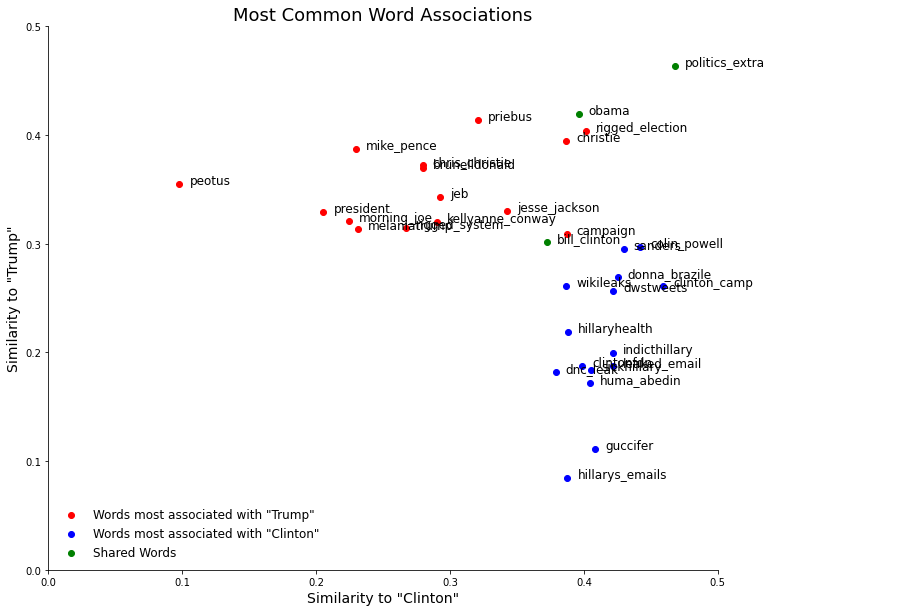

In [38]:
plt.figure(figsize=(12,10))

# HC words
plt.scatter(dt_words_hc_scores, dt_words_dt_scores, color='r', 
            label='Words most associated with "Trump"')

# DT Words
plt.scatter(hc_words_hc_scores, hc_words_dt_scores, color='b', 
            label='Words most associated with "Clinton"')

# Shared Words
plt.scatter(shared_score_hc, shared_score_dt, color='g', label='Shared Words')

# Point annotations
annotate_points(dt_words_hc_scores, dt_words_dt_scores, just_dt_words)
annotate_points(hc_words_hc_scores, hc_words_dt_scores, just_hc_words)
annotate_points(shared_score_hc, shared_score_dt, shared_words)

# figure formatting
plt.xlabel('Similarity to "Clinton"', fontsize=14)
plt.ylabel('Similarity to "Trump"',fontsize=14)
plt.title('Most Common Word Associations', fontsize=18)
plt.xlim(0, 0.5)
plt.ylim(0, 0.5)
plt.legend(loc='lower left', frameon=False, fontsize=12)
sns.despine()

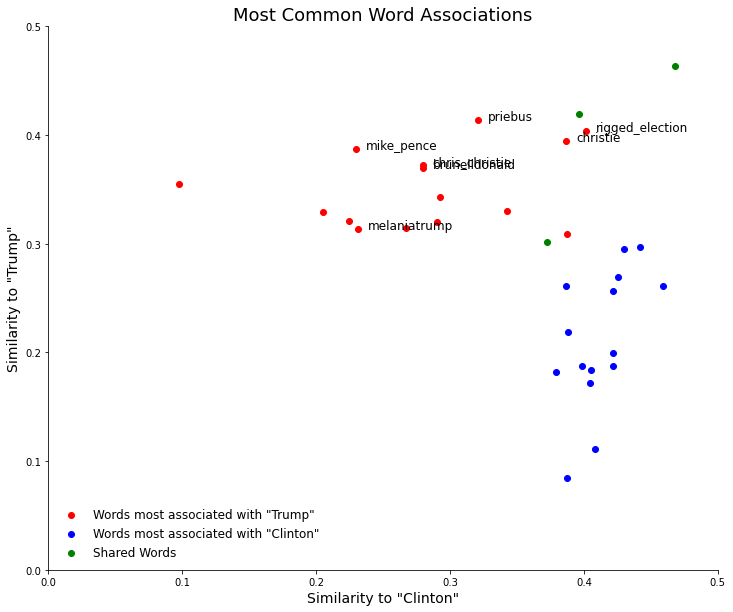

In [42]:
plt.figure(figsize=(12,10))

# HC words
plt.scatter(dt_words_hc_scores, dt_words_dt_scores, color='r', 
            label='Words most associated with "Trump"')

# DT Words
plt.scatter(hc_words_hc_scores, hc_words_dt_scores, color='b', 
            label='Words most associated with "Clinton"')

# Shared Words
plt.scatter(shared_score_hc, shared_score_dt, color='g', label='Shared Words')

# Point annotations
annotate_points(dt_words_hc_scores[:len(just_dt_words)//2], 
                dt_words_dt_scores[:len(just_dt_words)//2], 
                just_dt_words[:len(just_dt_words)//2]
               )
#annotate_points(hc_words_hc_scores, hc_words_dt_scores, just_hc_words)
#annotate_points(shared_score_hc, shared_score_dt, shared_words)

# figure formatting
plt.xlabel('Similarity to "Clinton"', fontsize=14)
plt.ylabel('Similarity to "Trump"',fontsize=14)
plt.title('Most Common Word Associations', fontsize=18)
plt.xlim(0, 0.5)
plt.ylim(0, 0.5)
plt.legend(loc='lower left', frameon=False, fontsize=12)
sns.despine()